# Projeto

Objetivo : Armazenar os gastos (até o momento) de cada deputado federal

1 - Obter os dados \
2 - Efetuar os ajustes necessários \
3 - Armazenar no sqlite

In [1]:
import pandas as pd

In [2]:
import requests

In [3]:
url = "https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome"
resultado = requests.get(url)

In [5]:
deputados = pd.DataFrame(resultado.json()["dados"])

In [6]:
deputados.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [7]:
deputados.shape

(513, 9)

In [10]:
gastos = []
for id in deputados.id:
    url_despesa = "https://dadosabertos.camara.leg.br/api/v2/"
    url_despesa = url_despesa+"deputados/"+str(id)+"/despesas?ordem=ASC&ano=2022"
    resposta = requests.get(url_despesa)
    gasto = pd.DataFrame(resposta.json()["dados"])
    gasto["id"] = id
    gastos.append(gasto)

In [12]:
len(gastos)

513

In [13]:
gastos[0]

,id


### Transformação

In [15]:
total = pd.concat(gastos)

In [16]:
total.head()

,id,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela
0,204379,2022.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7442249.0,Nota Fiscal,0.0,2022-08-23,13368602,725.38,https://www.camara.leg.br/cota-parlamentar/doc...,COMPANHIA ELÉTRICA AMAPÁ,05965546000109,725.38,0.0,,1879737.0,0.0
1,204379,2022.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7395106.0,Recibos/Outros,1.0,2022-05-30,05/22,5000.00,https://www.camara.leg.br/cota-parlamentar/doc...,NELY PRADO MASUKO,42886333972,5000.00,0.0,,1859805.0,0.0
2,204379,2022.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7421655.0,Recibos/Outros,1.0,2022-07-29,07/22,5000.00,https://www.camara.leg.br/cota-parlamentar/doc...,NELY PRADO MASUKO,42886333972,5000.00,0.0,,1870676.0,0.0
3,204379,2022.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7329295.0,Recibos/Outros,1.0,2022-01-31,S/N,5000.00,https://www.camara.leg.br/cota-parlamentar/doc...,NELY PRADO MASUKO,42886333972,5000.00,0.0,,1827864.0,0.0
4,204379,2022.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7337842.0,Recibos/Outros,1.0,2022-02-28,S/N,5000.00,https://www.camara.leg.br/cota-parlamentar/doc...,NELY PRADO MASUKO,42886333972,5000.00,0.0,,1831916.0,0.0


In [17]:
total.sample(3)

,id,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela
12,204355,2022.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7399477.0,Recibos/Outros,1.0,2022-06-01,s/n,7000.00,https://www.camara.leg.br/cota-parlamentar/doc...,BOUSQUET 2005 PARTICIPAÇÕES E INVESTIMENTO LTDA,07661480000180,7000.00,0.0,,1861859.0,0.0
0,204455,2022.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7327992.0,Nota Fiscal,0.0,2022-01-13,11015468,284.56,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS DE NOVA FRIBURGO,03119806000191,284.56,0.0,,1827308.0,0.0
12,204485,2022.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7322824.0,Nota Fiscal,0.0,2022-01-25,00005187,900.00,https://www.camara.leg.br/cota-parlamentar/doc...,SOLARYS SOLUCOES DIGITAIS LTDA,08648207000189,900.00,0.0,,1824807.0,0.0


In [18]:
#valores ausentes?
total.isnull().sum()

id                    0
ano                   0
mes                   0
tipoDespesa           0
codDocumento          0
tipoDocumento         0
codTipoDocumento      0
dataDocumento        52
numDocumento          0
valorDocumento        0
urlDocumento         99
nomeFornecedor        0
cnpjCpfFornecedor     0
valorLiquido          0
valorGlosa            0
numRessarcimento      0
codLote               0
parcela               0
dtype: int64

In [20]:
del total["dataDocumento"]

In [21]:
total.isnull().sum()

id                    0
ano                   0
mes                   0
tipoDespesa           0
codDocumento          0
tipoDocumento         0
codTipoDocumento      0
numDocumento          0
valorDocumento        0
urlDocumento         99
nomeFornecedor        0
cnpjCpfFornecedor     0
valorLiquido          0
valorGlosa            0
numRessarcimento      0
codLote               0
parcela               0
dtype: int64

In [22]:
del total["urlDocumento"]

In [23]:
total.isnull().sum()

id                   0
ano                  0
mes                  0
tipoDespesa          0
codDocumento         0
tipoDocumento        0
codTipoDocumento     0
numDocumento         0
valorDocumento       0
nomeFornecedor       0
cnpjCpfFornecedor    0
valorLiquido         0
valorGlosa           0
numRessarcimento     0
codLote              0
parcela              0
dtype: int64

In [24]:
total.head()

,id,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela
0,204379,2022.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7442249.0,Nota Fiscal,0.0,13368602,725.38,COMPANHIA ELÉTRICA AMAPÁ,05965546000109,725.38,0.0,,1879737.0,0.0
1,204379,2022.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7395106.0,Recibos/Outros,1.0,05/22,5000.00,NELY PRADO MASUKO,42886333972,5000.00,0.0,,1859805.0,0.0
2,204379,2022.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7421655.0,Recibos/Outros,1.0,07/22,5000.00,NELY PRADO MASUKO,42886333972,5000.00,0.0,,1870676.0,0.0
3,204379,2022.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7329295.0,Recibos/Outros,1.0,S/N,5000.00,NELY PRADO MASUKO,42886333972,5000.00,0.0,,1827864.0,0.0
4,204379,2022.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7337842.0,Recibos/Outros,1.0,S/N,5000.00,NELY PRADO MASUKO,42886333972,5000.00,0.0,,1831916.0,0.0


In [26]:
total.shape

(4200, 16)

In [27]:
total.numRessarcimento .value_counts()

     4127
0      73
Name: numRessarcimento, dtype: int64

In [28]:
del total ["numRessarcimento"]

In [30]:
total.head()

,id,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela
0,204379,2022.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7442249.0,Nota Fiscal,0.0,13368602,725.38,COMPANHIA ELÉTRICA AMAPÁ,05965546000109,725.38,0.0,1879737.0,0.0
1,204379,2022.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7395106.0,Recibos/Outros,1.0,05/22,5000.00,NELY PRADO MASUKO,42886333972,5000.00,0.0,1859805.0,0.0
2,204379,2022.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7421655.0,Recibos/Outros,1.0,07/22,5000.00,NELY PRADO MASUKO,42886333972,5000.00,0.0,1870676.0,0.0
3,204379,2022.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7329295.0,Recibos/Outros,1.0,S/N,5000.00,NELY PRADO MASUKO,42886333972,5000.00,0.0,1827864.0,0.0
4,204379,2022.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7337842.0,Recibos/Outros,1.0,S/N,5000.00,NELY PRADO MASUKO,42886333972,5000.00,0.0,1831916.0,0.0


In [32]:
# há duplicidade de dados?
print(total.shape)
total.drop_duplicates()
print(total.shape)

(4200, 15)
(4200, 15)


In [33]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200 entries, 0 to 14
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4200 non-null   int64  
 1   ano                4200 non-null   float64
 2   mes                4200 non-null   float64
 3   tipoDespesa        4200 non-null   object 
 4   codDocumento       4200 non-null   float64
 5   tipoDocumento      4200 non-null   object 
 6   codTipoDocumento   4200 non-null   float64
 7   numDocumento       4200 non-null   object 
 8   valorDocumento     4200 non-null   float64
 9   nomeFornecedor     4200 non-null   object 
 10  cnpjCpfFornecedor  4200 non-null   object 
 11  valorLiquido       4200 non-null   float64
 12  valorGlosa         4200 non-null   float64
 13  codLote            4200 non-null   float64
 14  parcela            4200 non-null   float64
dtypes: float64(9), int64(1), object(5)
memory usage: 525.0+ KB


In [34]:
total.describe()

,id,ano,mes,codDocumento,codTipoDocumento,valorDocumento,valorLiquido,valorGlosa,codLote,parcela
count,4200.000000,4200.0,4200.000000,4.200000e+03,4200.000000,4200.000000,4200.000000,4200.000000,4.200000e+03,4200.000000
mean,163071.250000,2022.0,5.844762,7.271809e+06,1.267619,1905.534050,1882.711440,19.673662,1.828929e+06,0.001190
std,47574.218694,0.0,3.452491,9.679528e+05,1.624356,4856.571281,4831.566737,377.647769,2.444132e+05,0.034487
min,62881.000000,2022.0,1.000000,0.000000e+00,0.000000,0.120000,0.120000,0.000000,0.000000e+00,0.000000
25%,141451.250000,2022.0,3.000000,7.351666e+06,0.000000,200.017500,200.000000,0.000000,1.838909e+06,0.000000
50%,178918.500000,2022.0,5.000000,7.398253e+06,1.000000,425.845000,419.525000,0.000000,1.861196e+06,0.000000
75%,204441.750000,2022.0,9.000000,7.445134e+06,1.000000,1500.000000,1500.000000,0.000000,1.881104e+06,0.000000
max,219585.000000,2022.0,12.000000,7.510117e+06,4.000000,119877.000000,119877.000000,14983.880000,1.914947e+06,1.000000


In [36]:
total.nomeFornecedor.value_counts()

CEMIG DISTRIBUIÇÃO S.A.                                          146
AMORETTO CAFES EXPRESSO LTDA                                     144
COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA                     120
CEEE - Companhia Estadual de Distribuição de Energia Elétrica     96
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA          93
                                                                ... 
BRUNO BELEZA - SOCIEDADE INDIVIDUAL DE ADVOCACIA                   1
MAGISTRAL ASSESSORIA & CONSULTORIA LEGISLATIVO EIRELI              1
KEYLA CRISTIANE MAIA PINTO                                         1
LOCARE - LOCADORA DE MATERIAIS PARA EVENTOS LTDA                   1
COMPANHIA ELÉTRICA AMAPÁ                                           1
Name: nomeFornecedor, Length: 742, dtype: int64

### Carga

In [37]:
from sqlalchemy import create_engine

In [38]:
engine = create_engine('sqlite:///dados_abertos.db')

In [39]:
deputados.to_sql('deputados' , engine)

513

In [40]:
total.to_sql('deputados_total' , engine)

4200

In [41]:
deputados.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [43]:
total = total.merge(deputados, on=['id'])

In [44]:
total.head()

,id,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,...,codLote,parcela,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204379,2022.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7442249.0,Nota Fiscal,0.0,13368602,725.38,COMPANHIA ELÉTRICA AMAPÁ,...,1879737.0,0.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
1,204379,2022.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7395106.0,Recibos/Outros,1.0,05/22,5000.00,NELY PRADO MASUKO,...,1859805.0,0.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,204379,2022.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7421655.0,Recibos/Outros,1.0,07/22,5000.00,NELY PRADO MASUKO,...,1870676.0,0.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
3,204379,2022.0,1.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7329295.0,Recibos/Outros,1.0,S/N,5000.00,NELY PRADO MASUKO,...,1827864.0,0.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
4,204379,2022.0,2.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7337842.0,Recibos/Outros,1.0,S/N,5000.00,NELY PRADO MASUKO,...,1831916.0,0.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br


In [47]:
gastos_deputados = total.groupby(['nome']).sum()[['valorDocumento']]

C:\Users\ideapad 330 81fe002b\AppData\Local\Temp\ipykernel_11456\3202835222.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gastos_deputados = total.groupby(['nome']).sum()[['valorDocumento']]


In [49]:
gastos_deputados = gastos_deputados.sort_values('valorDocumento' , ascending= False)

In [50]:
#Deputados que mais gastaram

gastos_deputados.head()

,valorDocumento
nome,
Vicentinho Júnior,399742.93
Gustinho Ribeiro,363013.48
Júnior Mano,245000.00
Silas Câmara,196867.29
Delegado Éder Mauro,167232.45


In [52]:
# deputados que menos gastaram
gastos_deputados.tail(10)

,valorDocumento
nome,
José Rocha,1737.92
Nicoletti,1710.55
Alceu Moreira,1673.77
Marcel van Hattem,1634.46
Marcos Aurélio Sampaio,1560.03
Pedro Uczai,1302.90
Sargento Fahur,1193.61
Adriana Ventura,919.81
Miguel Lombardi,817.76


In [53]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [54]:
total.nomeFornecedor.value_counts()[:10]

CEMIG DISTRIBUIÇÃO S.A.                                          146
AMORETTO CAFES EXPRESSO LTDA                                     144
COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA                     120
CEEE - Companhia Estadual de Distribuição de Energia Elétrica     96
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA          93
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME                      90
COMPANHIA ENERGÉTICA DO CEARÁ                                     67
Conde & Dell Aringa - Des de Softwares                            64
ENEL - Eletropaulo                                                59
Companhia Energética de Pernambuco                                59
Name: nomeFornecedor, dtype: int64

<Axes: >

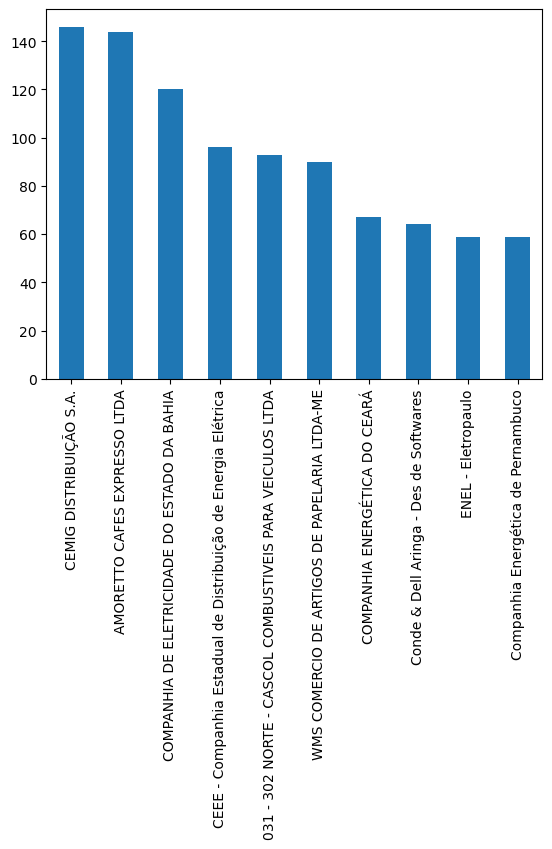

In [55]:
total.nomeFornecedor.value_counts()[:10].plot(kind='bar')